In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
sns.set()

# Import data and remove useless columns 

## Import data

In [2]:
employement_rate = pd.read_csv('./data/labour_market/EMP_RATE_by_birth_place_and_EDUC.csv')
min_wage = pd.read_csv('./data/labour_market/real minimum wage from 2001 to 2019.csv')
avg_duration_unemployment = pd.read_csv('./data/labour_market/average duration of unemployment.csv')
strictness_emply_protec = pd.read_csv('./data/labour_market/strictness of employment protection from 1998 to 2018.csv')
short_time_workers = pd.read_csv('./data/labour_market/percentage of short time workers from 2000.csv')
involuntary_pt_workers = pd.read_csv('./data/labour_market/percentage of involuntary part time workers from 2000.csv')
well_matched_skills_jobs = pd.read_csv('./data/labour_market/percentage of well matched skills for jobs.csv', dtype='unicode')
ft_and_pt_employ = pd.read_csv('./data/labour_market/percentage of full time part time employment.csv')
marginally_attached_workers = pd.read_csv('./data/labour_market/percentage of marginally attached workers from 2000.csv')
public_exp_LMP = pd.read_csv('./data/labour_market/public_exp_LMP.csv')
employees_bargain = pd.read_csv('./data/labour_market/percentage of employees that can bargain from 1998.csv')

## Dictionary with the country code of all OECD countries

In [3]:
oecd_countries = {'AUS': 'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 'CAN': 'Canada', 'CHL': 'Chile', 'COL': 'Colombia', 'CZE': 'Czech Republic', 'DNK': 'Denmark', 'EST': 'Estonia', 'FIN': 'Finland', 'FRA': 'France', 'DEU': 'Germany', 'GRC': 'Greece', 'HUN': 'Hungary', 'ISL': 'Iceland', 'IRL': 'Ireland', 'ISR': 'Israel', 'ITA': 'Italy', 'JPN': 'Japan', 'KOR': 'Korea', 'LVA': 'Latvia', 'LTU': 'Lithuania', 'LUX': 'Luxembourg', 'MEX': 'Mexico', 'NLD': 'Netherlands', 'NZL': 'New Zealand', 'NOR': 'Norway', 'POL': 'Poland', 'PRT': 'Portugal', 'SVK': 'Slovakia', 'SVN': 'Slovenia', 'ESP': 'Spain', 'SWE': 'Sweden', 'CHE': 'Switzerland', 'TUR': 'Turkey', 'GBR': 'United Kingdom', 'USA': 'United States'}

## Preparation of the data sets

### Removal of unnecessary columns and countries

In [4]:
employement_rate_croped_2015 = employement_rate.drop(['Country', 'Year', 'HATLEV1D', 'Place of birth', 'Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags', 'PowerCode Code', 'PowerCode'], axis=1)
print(employement_rate_croped_2015)
employement_rate_2015_total = employement_rate_croped_2015[employement_rate_croped_2015['Educational attainment']=='Total']
employement_rate_2015_low = employement_rate_croped_2015[employement_rate_croped_2015['Educational attainment']=='Low']
employement_rate_2015_medium = employement_rate_croped_2015[employement_rate_croped_2015['Educational attainment']=='Medium']
employement_rate_2015_high = employement_rate_croped_2015[employement_rate_croped_2015['Educational attainment']=='High']

    COUNTRY BIRTH Educational attainment  YEAR Unit Code        Unit  Value
0       AUS    FB                  Total  2015        PC  Percentage   73.0
1       AUT    FB                  Total  2015        PC  Percentage   67.4
2       AUT    FB                    Low  2015        PC  Percentage   51.3
3       AUT    FB                 Medium  2015        PC  Percentage   71.2
4       AUT    FB                   High  2015        PC  Percentage   75.8
..      ...   ...                    ...   ...       ...         ...    ...
236     TUR    FB                   High  2015        PC  Percentage   60.6
237     TUR    NB                  Total  2015        PC  Percentage   55.2
238     TUR    NB                    Low  2015        PC  Percentage   47.9
239     TUR    NB                 Medium  2015        PC  Percentage   62.5
240     TUR    NB                   High  2015        PC  Percentage   76.7

[241 rows x 7 columns]


In [5]:
public_exp_LMP = public_exp_LMP[['LFS_COUNTRY', 'PROG', 'Time', 'Value']]

In [23]:
public_exp_LMP_2017 = public_exp_LMP[(public_exp_LMP.Time==2017) & (public_exp_LMP['PROG']==100)].drop(['Time', 'PROG'], axis=1).reset_index(drop=True)

Text(0, 0.5, '')

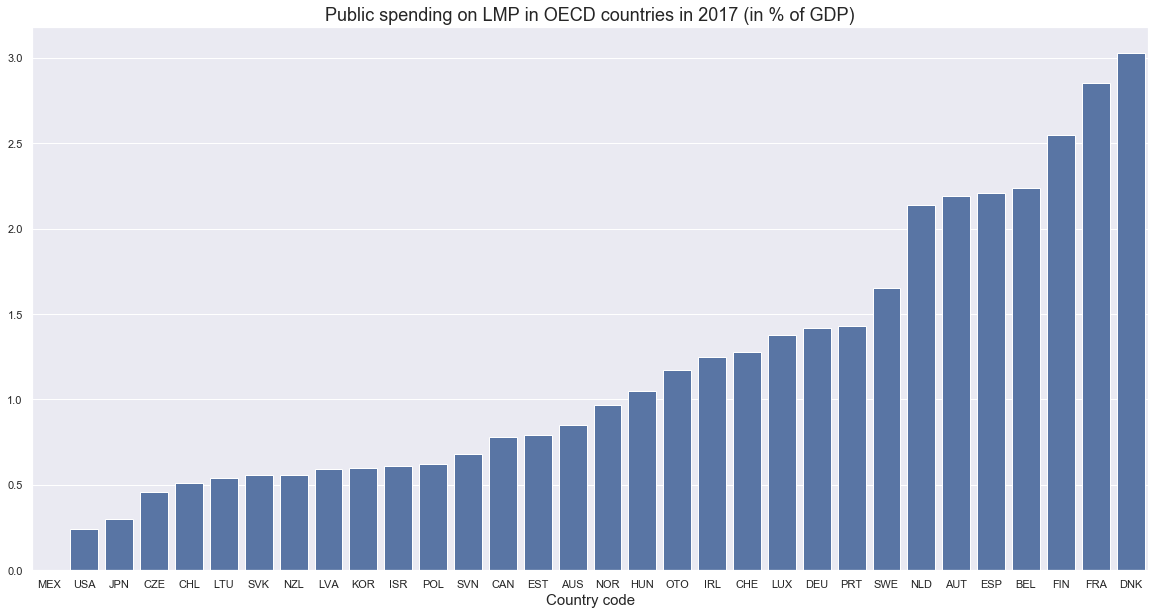

In [46]:
plt.figure(figsize=(20,10))
sns.barplot(x='LFS_COUNTRY',y='Value',data=public_exp_LMP_2017,order=public_exp_LMP_2017.sort_values('Value')["LFS_COUNTRY"],color="C0")
plt.title("Public spending on LMP in OECD countries in 2017 (in % of GDP)", size=18)
plt.xlabel('Country code', size=15)
plt.ylabel('')

## Skills matched for jobs in percentage

In [8]:
overqualified_workers = well_matched_skills_jobs[well_matched_skills_jobs.VAR=='OVERQUAL']
underqualified_workers = well_matched_skills_jobs[well_matched_skills_jobs.VAR=='UNDERQUAL']
well_matched_workers = well_matched_skills_jobs[well_matched_skills_jobs.VAR=='WELLM']
low_qualif = well_matched_skills_jobs[well_matched_skills_jobs.VAR=='JOB_REQ_LS']
med_qualif = well_matched_skills_jobs[well_matched_skills_jobs.VAR=='JOB_REQ_MS']
high_qualif = well_matched_skills_jobs[well_matched_skills_jobs.VAR=='JOB_REQ_HS']

In [9]:
overqualified_workers_oecd = pd.DataFrame(columns=overqualified_workers.columns)
for code in oecd_countries.keys():
    overqualified_workers_oecd = overqualified_workers_oecd.append(overqualified_workers[overqualified_workers['LOCATION']==code], ignore_index=True)
overqualified_workers_oecd_croped = overqualified_workers_oecd[['LOCATION', 'SEX', 'TIME', 'Value']]
overqualified_workers_oecd_2012 = overqualified_workers_oecd_croped[(overqualified_workers_oecd_croped['SEX']=='T') & (overqualified_workers_oecd_croped['TIME']=='2012')].drop(['SEX', 'TIME'], axis=1).reset_index(drop=True)

In [10]:
underqualified_workers_oecd = pd.DataFrame(columns=underqualified_workers.columns)
for code in oecd_countries.keys():
    underqualified_workers_oecd = underqualified_workers_oecd.append(underqualified_workers[underqualified_workers['LOCATION']==code], ignore_index=True)
underqualified_workers_oecd_croped = underqualified_workers_oecd[['LOCATION', 'SEX', 'TIME', 'Value']]
underqualified_workers_oecd_2012 = underqualified_workers_oecd_croped[(underqualified_workers_oecd_croped['SEX']=='T') & (underqualified_workers_oecd_croped['TIME']=='2012')].drop(['SEX', 'TIME'], axis=1).reset_index(drop=True)

In [60]:
well_matched_workers_oecd = pd.DataFrame(columns=well_matched_workers.columns)
for code in oecd_countries.keys():
    well_matched_workers_oecd = well_matched_workers_oecd.append(well_matched_workers[well_matched_workers['LOCATION']==code], ignore_index=True)
well_matched_workers_oecd_croped = well_matched_workers_oecd[['LOCATION', 'SEX', 'TIME', 'Value']]
well_matched_workers_oecd_2012 = well_matched_workers_oecd_croped[(well_matched_workers_oecd_croped['SEX']=='T') & (well_matched_workers_oecd_croped['TIME']=='2012')].drop(['SEX', 'TIME'], axis=1).reset_index(drop=True)

#converting str to float
well_matched_workers_oecd_2012.Value = well_matched_workers_oecd_2012.Value.astype(float)

In [12]:
low_qualif_oecd = pd.DataFrame(columns=low_qualif.columns)
for code in oecd_countries.keys():
    low_qualif_oecd = low_qualif_oecd.append(low_qualif[low_qualif['LOCATION']==code], ignore_index=True)
low_qualif_oecd_croped = low_qualif_oecd[['LOCATION', 'SEX', 'TIME', 'Value']]
low_qualif_oecd_2012 = low_qualif_oecd_croped[(low_qualif_oecd_croped['SEX']=='T') & (low_qualif_oecd_croped['TIME']=='2012')].drop(['SEX', 'TIME'], axis=1).reset_index(drop=True)

In [13]:
med_qualif_oecd = pd.DataFrame(columns=med_qualif.columns)
for code in oecd_countries.keys():
    med_qualif_oecd = med_qualif_oecd.append(med_qualif[med_qualif['LOCATION']==code], ignore_index=True)
med_qualif_oecd_croped = med_qualif_oecd[['LOCATION', 'SEX', 'TIME', 'Value']]
med_qualif_oecd_2012 = med_qualif_oecd_croped[(med_qualif_oecd_croped['SEX']=='T') & (med_qualif_oecd_croped['TIME']=='2012')].drop(['SEX', 'TIME'], axis=1).reset_index(drop=True)

In [14]:
high_qualif_oecd = pd.DataFrame(columns=high_qualif.columns)
for code in oecd_countries.keys():
    high_qualif_oecd = high_qualif_oecd.append(high_qualif[high_qualif['LOCATION']==code], ignore_index=True)
high_qualif_oecd_croped = high_qualif_oecd[['LOCATION', 'SEX', 'TIME', 'Value']]
high_qualif_oecd_2012 = high_qualif_oecd_croped[(high_qualif_oecd_croped['SEX']=='T') & (high_qualif_oecd_croped['TIME']=='2012')].drop(['SEX', 'TIME'], axis=1).reset_index(drop=True)

### Descriptive stats for well matched jobs

Text(0, 0.5, '')

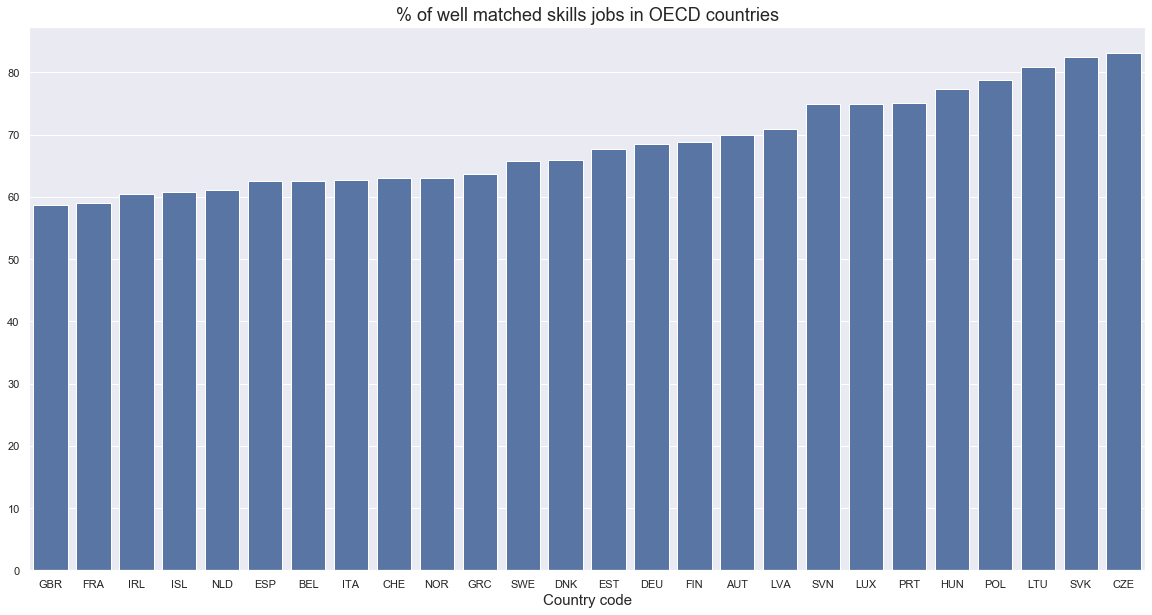

In [64]:
plt.figure(figsize=(20,10))
sns.barplot(x="LOCATION",y='Value',data = well_matched_workers_oecd_2012,order = well_matched_workers_oecd_2012.sort_values('Value')['LOCATION'],color= "C0")
plt.title("% of well matched skills jobs in OECD countries", size=18)
plt.xlabel('Country code', size=15)
plt.ylabel('')

## Minimum wage

In [111]:
min_wage_croped = min_wage[['COUNTRY','SERIES','PERIOD','TIME','Value']]
min_wage_oecd = pd.DataFrame(columns=min_wage_croped.columns)
for code in oecd_countries.keys():
    min_wage_oecd = min_wage_oecd.append(min_wage_croped[min_wage_croped.COUNTRY == code],ignore_index=True)
    
min_wage_oecd_PPP = min_wage_oecd[(min_wage_oecd.SERIES == 'PPP') & (min_wage_oecd.PERIOD == 'A')]


In [112]:
min_wage_oecd_PPP_2017 = min_wage_oecd_PPP[min_wage_oecd_PPP['TIME']==2017].drop(['SERIES', 'PERIOD','TIME'], axis=1).reset_index(drop=True)

Text(0, 0.5, '')

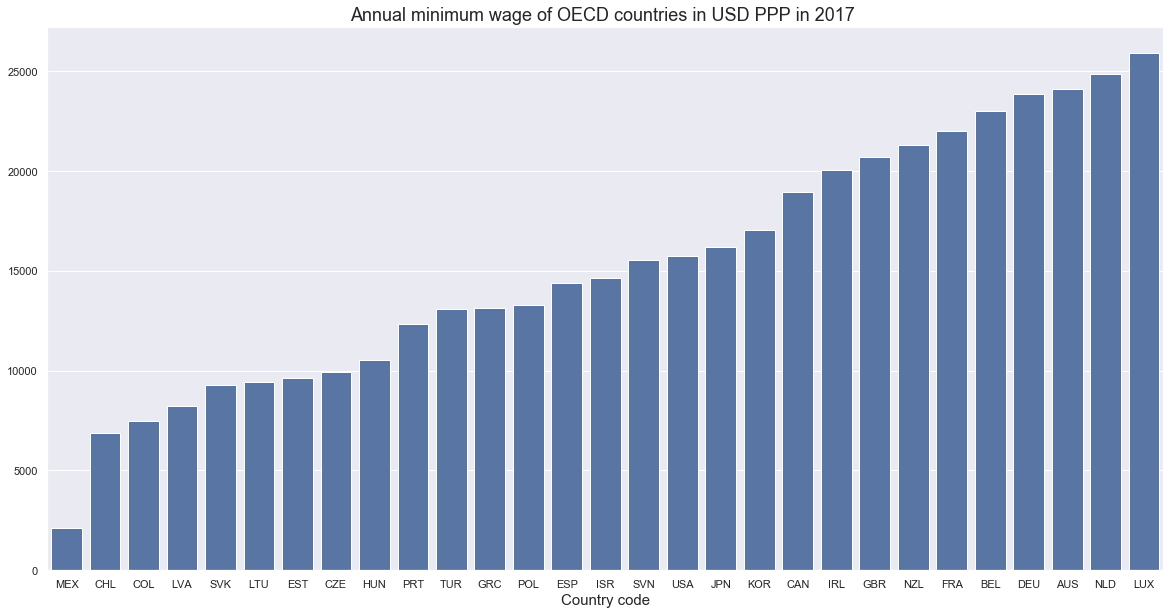

In [113]:
plt.figure(figsize=(20,10))
sns.barplot(x="COUNTRY",y='Value',data = min_wage_oecd_PPP_2017, order = min_wage_oecd_PPP_2017.sort_values('Value')['COUNTRY'],color= "C0")
plt.title("Annual minimum wage of OECD countries in USD PPP in 2017 ", size=18)
plt.xlabel('Country code', size=15)
plt.ylabel('')

In [103]:
min_wage_oecd_PPP

,COUNTRY,SERIES,PERIOD,TIME,Value
38,AUS,PPP,A,2001,21503.435892
39,AUS,PPP,A,2002,21715.267268
40,AUS,PPP,A,2003,21998.608473
41,AUS,PPP,A,2004,22384.714008
42,AUS,PPP,A,2005,22566.219653
...,...,...,...,...,...
2082,USA,PPP,A,2015,16265.980260
2083,USA,PPP,A,2016,16063.328012
2084,USA,PPP,A,2017,15728.297963
2085,USA,PPP,A,2018,15353.281279
